First name : Adrien
Last name : Montaigne
SID : 2248806

**Step I : Import librairies**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from pandas.plotting import scatter_matrix

**Step II : Import dataset**

In [2]:
df = pd.read_csv("diabetes-1.csv")

**Step III : Data exploration**

The shape of the dataset

In [51]:
df.shape

(768, 9)

info on the dataset

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


List types of all columns

In [54]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

summary of the dataset

In [55]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

**Step IV : Split it into Test and Train**

In [3]:
from sklearn.model_selection import train_test_split

Y = df.iloc[:,-1]
X = df.iloc[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Step V : Data visualisation**

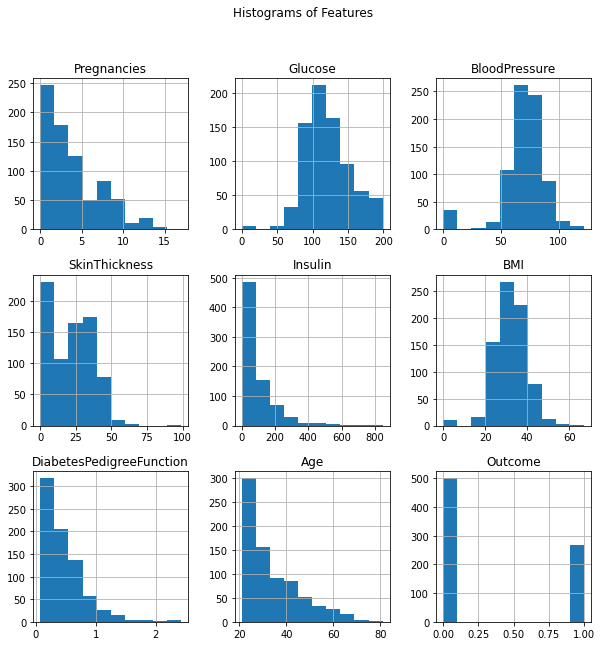

In [5]:
df.hist(figsize=(10,10))
plt.suptitle('Histograms of Features')
plt.show()

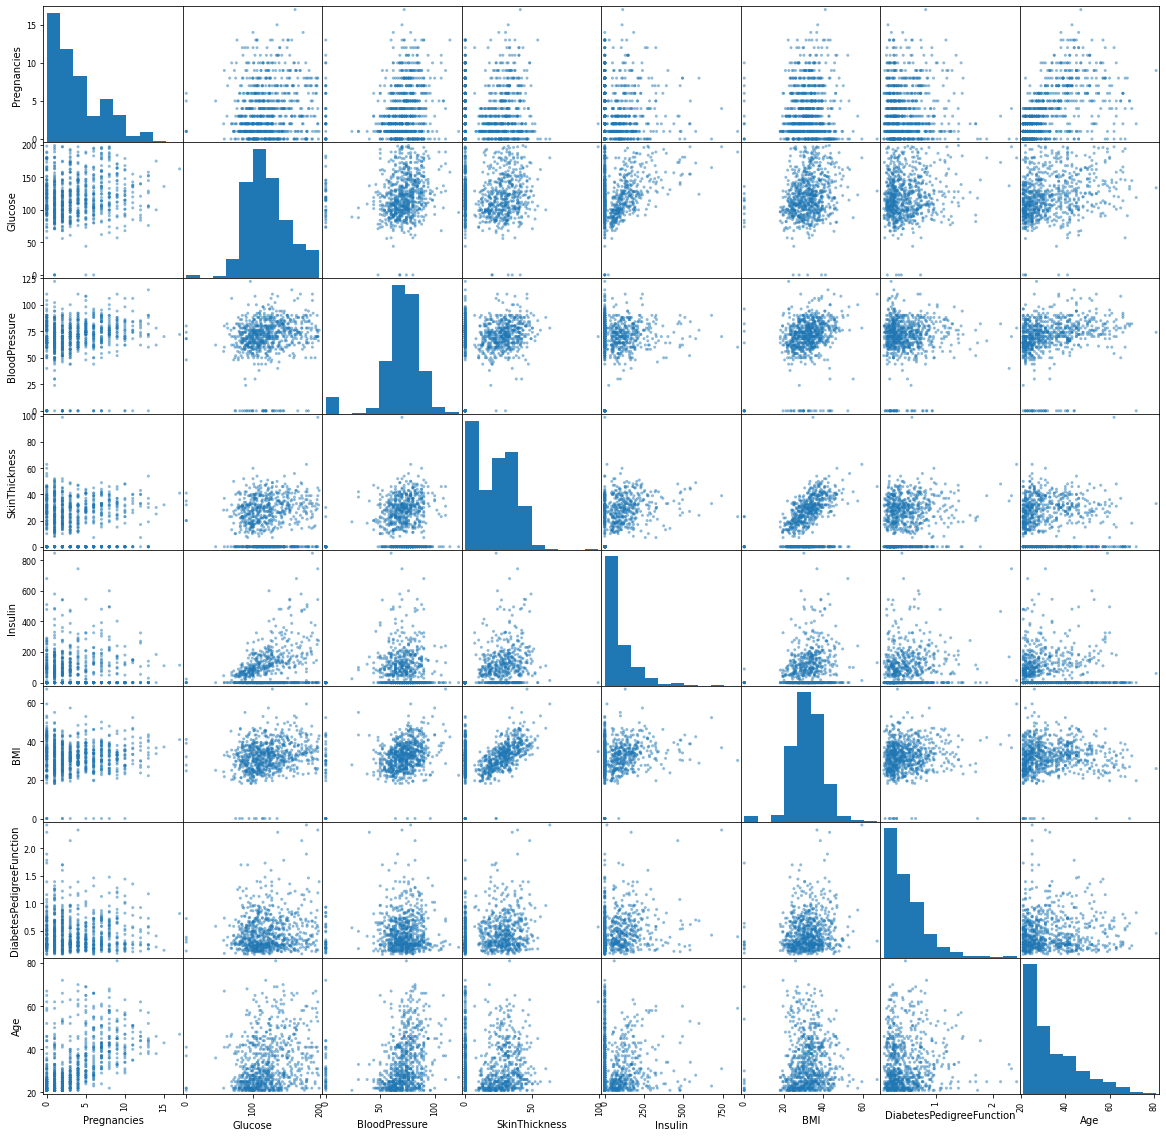

In [56]:
scatter_matrix(X, figsize = (20,20));

[]

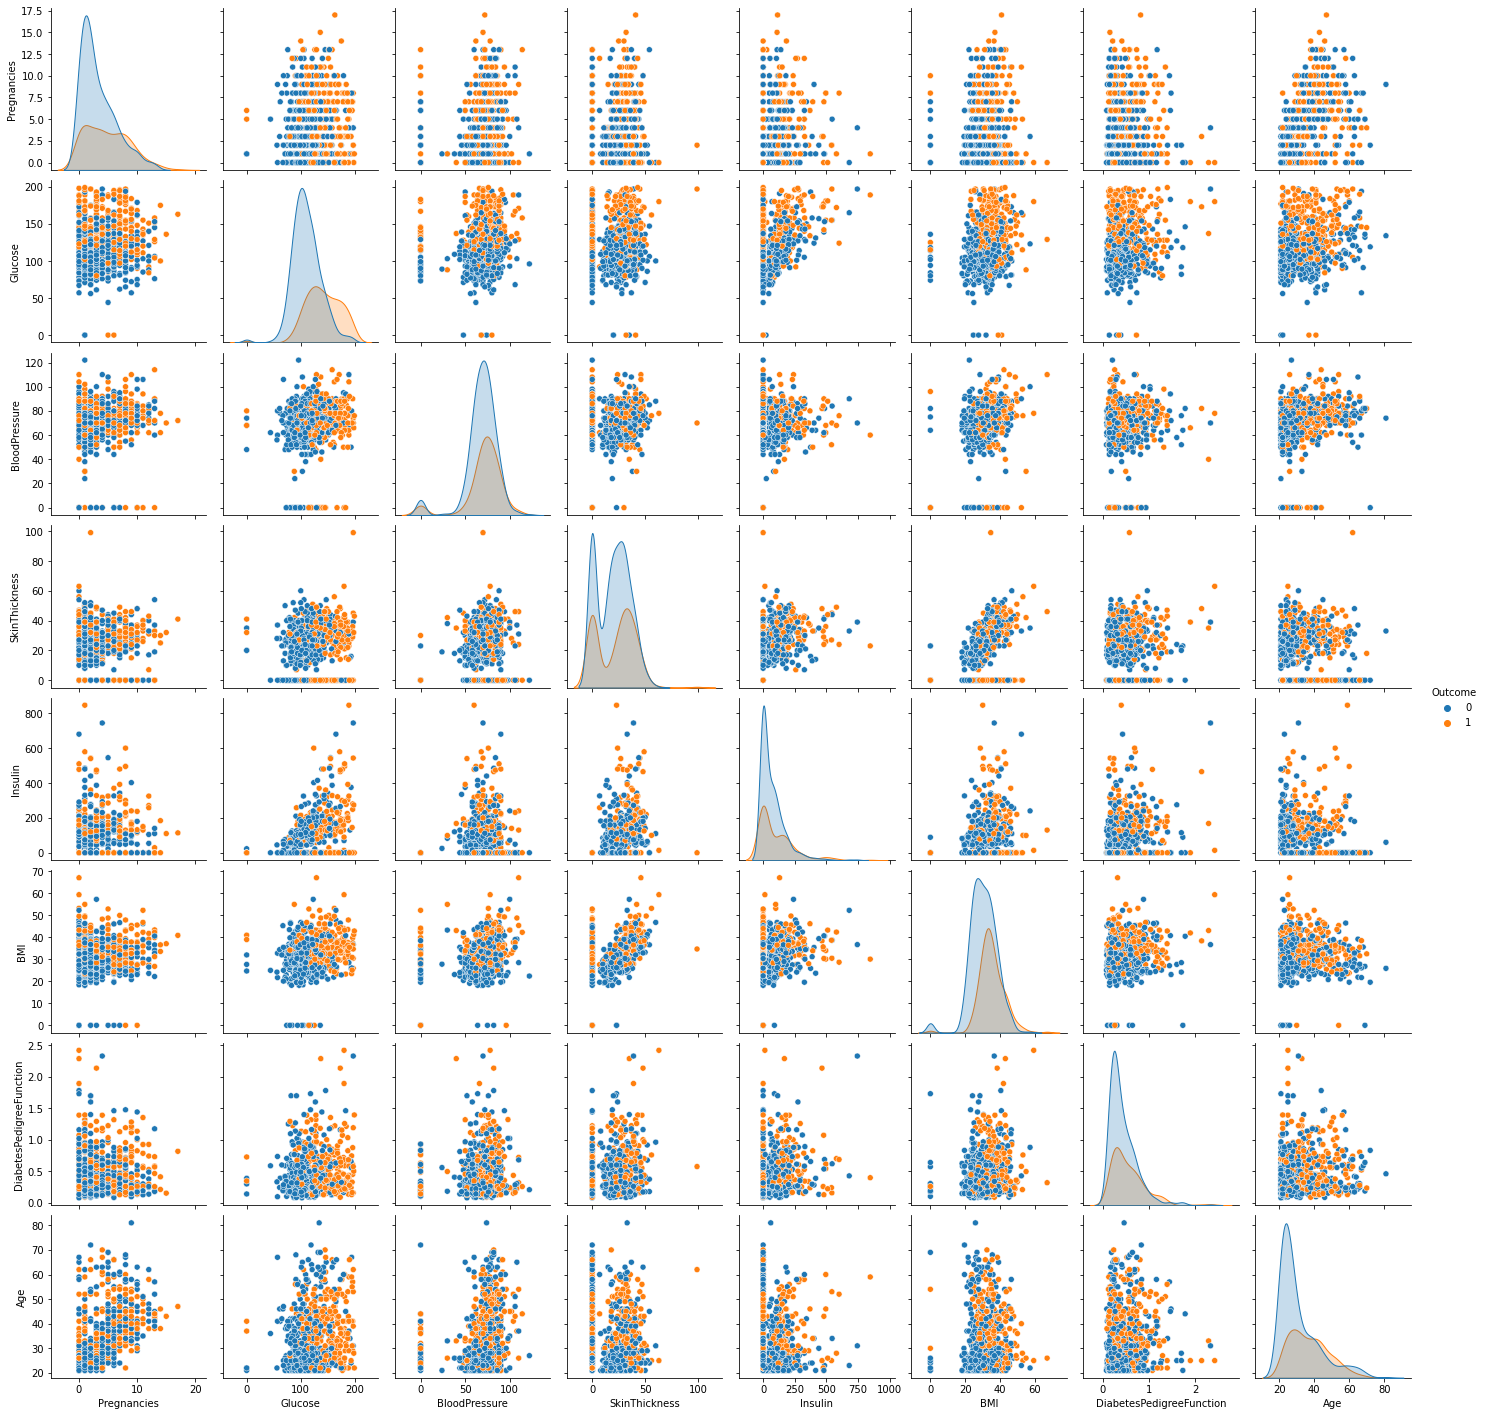

In [57]:
sns.pairplot(data = df, hue= 'Outcome')
plt.plot()

**Step VI : Checking if the variable are independent**

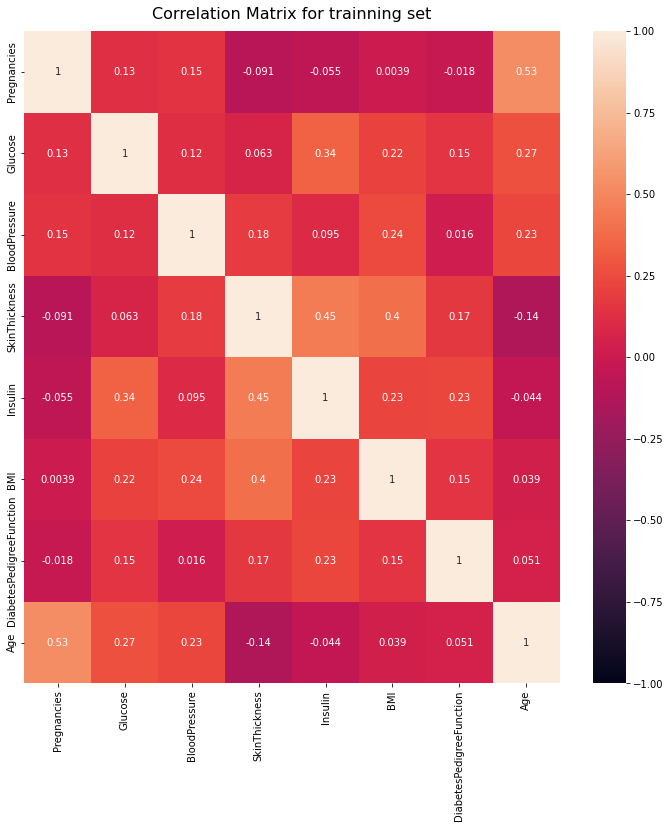

In [7]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix for trainning set', fontdict={'fontsize':16}, pad=12);

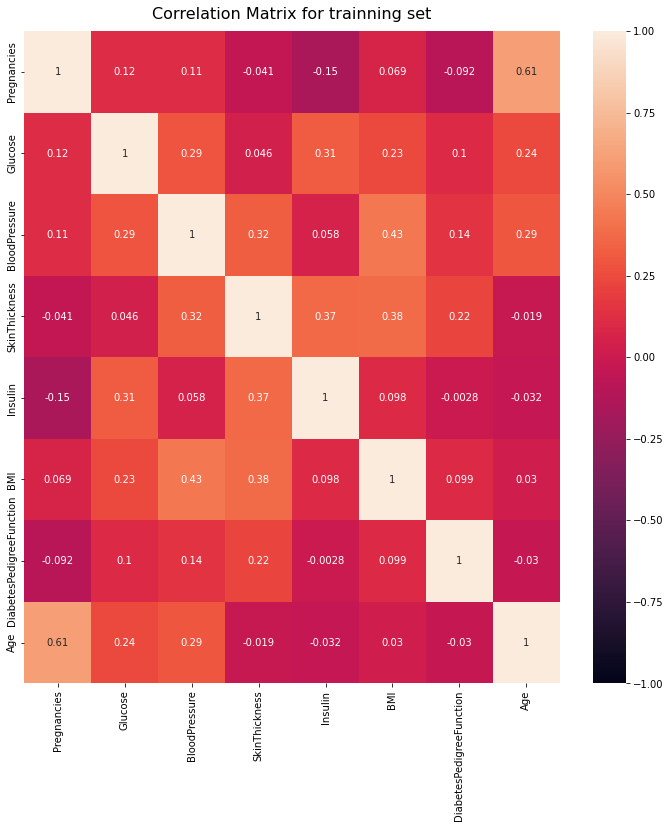

In [8]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(X_test.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix for trainning set', fontdict={'fontsize':16}, pad=12);

**Step VII : Replacing zero (0) by the mean**

In [9]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
Imputer.fit(X_train[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])
X_train[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]] = Imputer.transform(X_train[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])
Imputer.fit(X_test[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])
X_test[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]] = Imputer.transform(X_test[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])

**Step VIII : Outliers**

In [10]:
from scipy import stats
X_train = X_train.apply(stats.zscore)

**Step IX : Standardising data - Feature normalisation**

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_test.fit_transform(X_test)

**Step X: Decision Tree**

Training the Decision Tree Regression model on the whole dataset

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1.])

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(Y_test, y_pred)
accuracy_score1 = [0]*6
f1_score1 = [0]*6
print(cm)
accuracy_score1[0] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[0] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[77 22]
 [22 33]]
0.7142857142857143
0.6


**Step XI: Logisitic Regression**

Training the Logisitic Regression model on the whole dataset

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)

Making confusion matrix and calculate the score

In [17]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[1] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[1] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[88 11]
 [26 29]]
0.7597402597402597
0.6105263157894736


**Step XII: Random Forest**

Training the random forest model on the whole dataset

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=5 , random_state=0)
clf.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5, random_state=0)

Predicting the Test set results

In [19]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [20]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[2] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[2] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[86 13]
 [19 36]]
0.7922077922077922
0.6923076923076923


**Step XIII: Support Vector Machine**

Training the Support vector machine on the whole dataset

In [21]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

Predicting the Test set results

In [22]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [23]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[3] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[3] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[93  6]
 [27 28]]
0.7857142857142857
0.6292134831460674


**Step XIV: K-Nearest Neighbors (KNN)**

Training the K-Nearest Neighbors on the whole dataset

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

Predicting the Test set results

In [25]:
y_pred = neigh.predict(X_test)

Making confusion matrix and calculate the score

In [26]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[4] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[4] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[88 11]
 [20 35]]
0.7987012987012987
0.693069306930693


**Step XV: Artificial Neural Network**

Training the Artificial Neural Network

In [27]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [28]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [31]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6727 - accuracy: 0.6987
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6615 - accuracy: 0.7199
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.7345
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7362
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7410
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.7427
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.7427
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7394
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7410
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.7427
Epoch 11/

Predicting the Test set results

In [33]:
y_pred = ann.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [34]:
y_pred = (y_pred > 0.5)

Making confusion matrix and calculate the score

In [35]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[5] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[5] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[89 10]
 [21 34]]
0.7987012987012987
0.6868686868686869


**Step XVI : Data Visualisation**

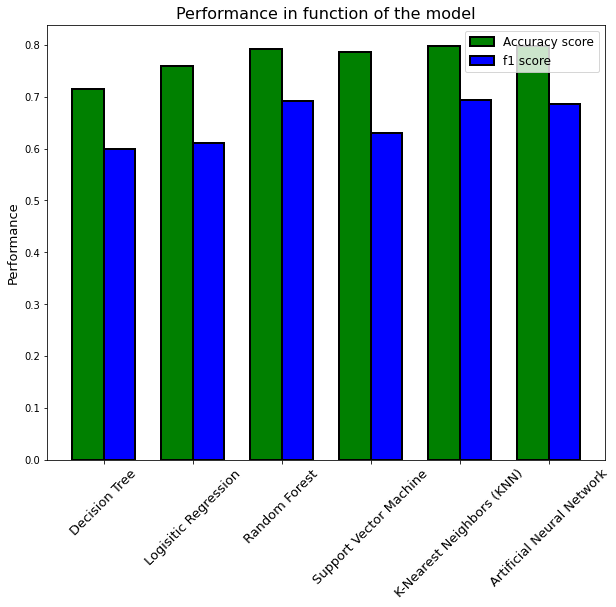

In [36]:
largeur_barre = 0.35 
names = ['Decision Tree', 'Logisitic Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors (KNN)','Artificial Neural Network']
x1 = range(len(names)) 
x2 = [i + largeur_barre for i in x1]
f = plt.figure(figsize=(10, 8))
plt.ylabel('Performance',fontsize = 13)
plt.title("Performance in function of the model",fontsize = 16)
plt.bar(x1,accuracy_score1,width=0.35, color = 'green',edgecolor = 'black', linewidth = 2)
plt.bar(x2,f1_score1,width=0.35, color = 'blue', edgecolor = 'black', linewidth = 2)
plt.xticks([r + largeur_barre / 2 for r in range(len(x1))],names,fontsize = 13,rotation =45)
plt.legend(['Accuracy score','f1 score'],fontsize = 12)
plt.show()

**Step XVII : Voting Classifier**

Training the model

In [37]:
from sklearn.ensemble import VotingClassifier
model_A = LogisticRegression(random_state = 0)
model_B = KNeighborsClassifier(n_neighbors=3)
model_C = svm.SVC(random_state=0)
model_D = VotingClassifier([('Logistic Regression', model_A),
                            ('KNN',model_B),
                            ('SVM',model_C)],
                           voting = 'hard')

for model in (model_A, model_B, model_C,model_D):
  model.fit(X_train, Y_train)


Predicting the Test set results

In [38]:
y_pred = model.predict(X_test)

Making confusion matrix and calculate the score

In [39]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[92  7]
 [27 28]]
0.7792207792207793
0.6222222222222221


**Step XVIII : Bagging**

Training the model

In [40]:
from sklearn.ensemble import BaggingClassifier
model2 = BaggingClassifier(base_estimator = LogisticRegression(random_state = 0), n_estimators = 100)
model2.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                  n_estimators=100)

Predicting the Test set results

In [41]:
y_pred = model2.predict(X_test)

Making confusion matrix and calculate the score

In [42]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[88 11]
 [26 29]]
0.7597402597402597
0.6105263157894736


**XIX : Boosting**

Training the model

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

Predicting the Test set results

In [44]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [45]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[84 15]
 [18 37]]
0.7857142857142857
0.6915887850467289


**Step XX : Stacking**

Training the model

In [46]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
        ('lr', LogisticRegression(random_state = 0)),
        ('KNN',KNeighborsClassifier(n_neighbors=3)),
        ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
        ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train,Y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                               ('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

Predicting the Test set results

In [47]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [48]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[87 12]
 [25 30]]
0.7597402597402597
0.6185567010309277


**Step XXI : Importance of feature with decision tree**

In [49]:
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

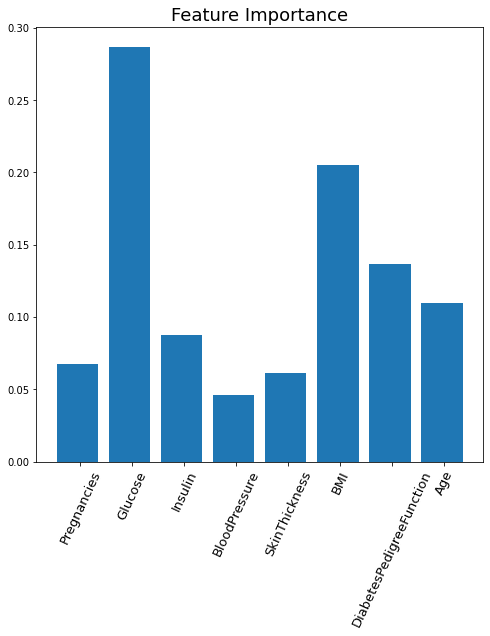

In [50]:
from sklearn.datasets import make_regression
Names= ["Pregnancies","Glucose","Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]
f = plt.figure(figsize=(8, 8))
importance = tree.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([r + 0.1 / 2 for r in range(len(importance))],Names,fontsize = 13,rotation=65)
plt.title("Feature Importance", fontsize = 18)
plt.show()